In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
file_path = r"C:\Users\admin\Downloads\advertising.csv"
df = pd.read_csv(file_path)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# Checking and removing missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
# Define features and target variable
features = ['TV', 'Radio', 'Newspaper']
X = df[features]
y = df['Sales']

In [6]:
# Split a dataset into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.91
R-squared (R2): 0.91


In [14]:
# Calculate the average of 'TV', 'Radio', and 'Newspaper' columns
average_TV = df['TV'].mean()
average_radio = df['Radio'].mean()
average_newspaper = df['Newspaper'].mean()

print(f"Average TV value: {average_TV:.2f}")
print(f"Average Radio value: {average_radio:.2f}")
print(f"Average Newspaper value: {average_newspaper:.2f}")

Average TV value: 147.04
Average Radio value: 23.26
Average Newspaper value: 30.55


In [17]:
# Calculate the initial value of TV from the 'TV' column
initial_TV = df['TV'].min()
print(f"Initial TV value: {initial_TV:.2f}")


Initial TV value: 0.70


In [18]:
# Average Value for TV, Radio, and Newspaper for the future prediction
TV_value = 147.04    
radio_value = 23.26  
newspaper_value = 30.55  

# Future prediction using the model
future_data = [[TV_value, radio_value, newspaper_value]]
future_sales = model.predict(future_data)

print(f"Predicted future sales: {future_sales[0]:.2f}")


Predicted future sales: 15.21


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


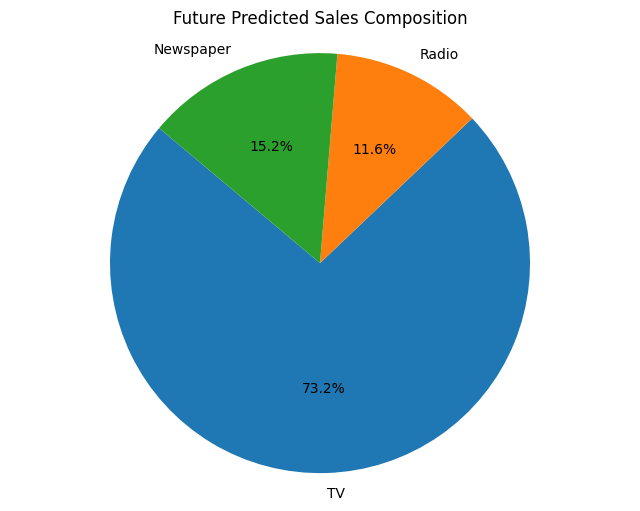

In [20]:
import matplotlib.pyplot as plt

# Average Value for TV, Radio, and Newspaper for the future prediction
TV_value = 147.04    
radio_value = 23.26  
newspaper_value = 30.55  

# Future prediction using the model
future_data = [[TV_value, radio_value, newspaper_value]]
future_sales = model.predict(future_data)

# Calculate percentages for TV, Radio, Newspaper
total_sales = sum(future_data[0])
percentages = [(TV_value / total_sales) * 100, (radio_value / total_sales) * 100, (newspaper_value / total_sales) * 100]
labels = ['TV', 'Radio', 'Newspaper']

# Create a pie chart for the future predicted values
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Future Predicted Sales Composition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
